<a href="https://colab.research.google.com/github/kevinagredojara/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📥 Carga de datos desde la API de Telecom X


In [6]:
import pandas as pd; df = pd.read_json("https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json")


### 🔍 Exploración de la estructura y tipos de datos del dataset


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### 📊 Identificación de columnas disponibles en el dataset


In [8]:
df.columns


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

### 🧪 Comprobación de valores ausentes y duplicados en el dataset


In [10]:
df.isnull().sum(), df.astype(str).duplicated().sum()


(customerID    0
 Churn         0
 customer      0
 phone         0
 internet      0
 account       0
 dtype: int64,
 np.int64(0))

### 🛠️ Manejo de inconsistencias y preparación de los datos


In [11]:
df = df.fillna("No informado")


### 📈 Análisis descriptivo del comportamiento de los clientes


In [12]:
df.describe()


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


### 📊 Distribución de la evasión de clientes (Churn)


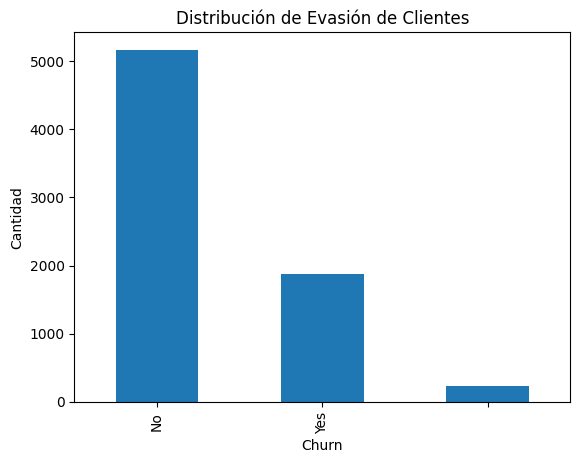

In [13]:
import matplotlib.pyplot as plt; df["Churn"].value_counts().plot(kind="bar"); plt.title("Distribución de Evasión de Clientes"); plt.xlabel("Churn"); plt.ylabel("Cantidad"); plt.show()


### 🔧 Normalización de datos anidados para análisis categórico


In [16]:
df = pd.json_normalize(df.to_dict(orient="records"))


### 📊 Recuento de evasión por tipo de contrato


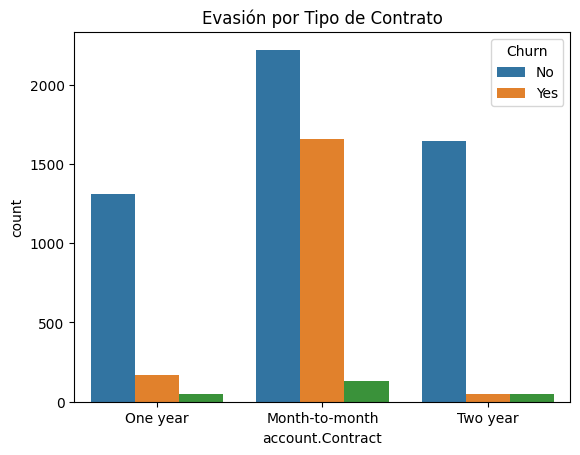

In [17]:
import seaborn as sns; import matplotlib.pyplot as plt; sns.countplot(data=df, x="account.Contract", hue="Churn"); plt.title("Evasión por Tipo de Contrato"); plt.show()


### 📊 Distribución de evasión según tiempo de contrato


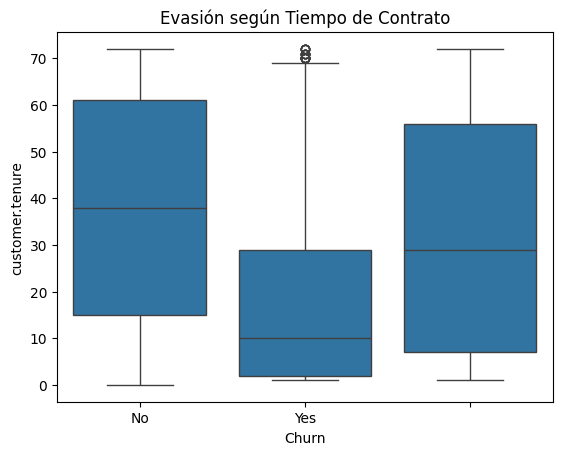

In [21]:
import seaborn as sns; import matplotlib.pyplot as plt; sns.boxplot(data=df, x="Churn", y="customer.tenure"); plt.title("Evasión según Tiempo de Contrato"); plt.show()


## 📄 Informe Final – Análisis de Evasión de Clientes (Churn) en Telecom X


### 🔹 Introducción
El objetivo de este análisis es comprender los factores asociados a la evasión de clientes (Churn) en Telecom X. La empresa enfrenta una alta tasa de cancelaciones, lo que impacta directamente en sus ingresos y estabilidad. A través del análisis de datos históricos de clientes, se busca identificar patrones y comportamientos que permitan apoyar futuras estrategias de retención y el desarrollo de modelos predictivos.


### 🔹 Limpieza y Tratamiento de Datos
Los datos fueron extraídos directamente desde una API en formato JSON. Debido a que el dataset contenía estructuras anidadas, fue necesario normalizar los datos para facilitar su análisis. Posteriormente, se realizó una revisión de valores ausentes y duplicados, aplicando un tratamiento básico para asegurar la coherencia del conjunto de datos. Este proceso permitió preparar la información para el análisis exploratorio.


### 🔹 Análisis Exploratorio de Datos
Durante el análisis exploratorio se evaluó la distribución de la variable objetivo (Churn), observando la proporción de clientes que cancelaron frente a los que permanecieron. Además, se analizaron variables categóricas y numéricas relevantes, como el tipo de contrato y el tiempo de permanencia del cliente. Las visualizaciones permitieron identificar diferencias claras entre los perfiles de clientes que evaden y los que no.


### 🔹 Conclusiones e Insights
El análisis mostró que la evasión está más concentrada en clientes con menor tiempo de contrato, lo que sugiere una mayor probabilidad de cancelación en las primeras etapas de la relación con la empresa. Asimismo, ciertos tipos de contrato presentan mayores niveles de churn, lo que indica oportunidades de mejora en las condiciones ofrecidas a estos segmentos.


### 🔹 Recomendaciones
Con base en los hallazgos, se recomienda enfocar estrategias de retención en clientes nuevos, fortaleciendo la experiencia durante los primeros meses de servicio. También se sugiere revisar los planes y condiciones de los contratos con mayor evasión, así como utilizar estos insights como base para el desarrollo de modelos predictivos que permitan anticipar la cancelación y actuar de forma proactiva.
